<a href="https://colab.research.google.com/github/Chockalingam-M/Deep-Learning-for-Computer_Vision/blob/main/color_Image_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import random as python_random
np.random.seed(123)
python_random.seed(123)
tf.random.set_seed(1234)

In [3]:
!wget -q -P ./ https://www.dropbox.com/s/w07liww46kgxo1m/handbags-shoes.zip
!unzip -qq handbags-shoes.zip

In [4]:
import os, shutil, pathlib

base_dir = pathlib.Path("/content/handbags-shoes")

for category in ('handbags', 'shoes'):
  fnames = os.listdir(base_dir/category)
  dir = base_dir /'train' / category
  os.makedirs(dir)
  for fname in fnames[:50]:
      shutil.copyfile(src=base_dir/category/fname,
                      dst=dir/fname)
  dir = base_dir /'validation' / category
  os.makedirs(dir)
  for fname in fnames[50:75]:
      shutil.copyfile(src=base_dir/category/fname,
                      dst=dir/fname)
  dir = base_dir /'test' / category
  os.makedirs(dir)
  for fname in fnames[75:]:
      shutil.copyfile(src=base_dir/category/fname,
                      dst=dir/fname)

In [5]:
from tensorflow.keras.preprocessing import image_dataset_from_directory

train_dataset = image_dataset_from_directory (base_dir / 'train',
                                              image_size = (224,224),
                                              batch_size=32)

validation_dataset = image_dataset_from_directory (base_dir / 'validation',
                                                   image_size=(224,224),
                                                   batch_size=32)

test_dataset = image_dataset_from_directory (base_dir / 'test',
                                             image_size=(224,224),
                                             batch_size=32)

Found 97 files belonging to 2 classes.
Found 49 files belonging to 2 classes.
Found 39 files belonging to 2 classes.


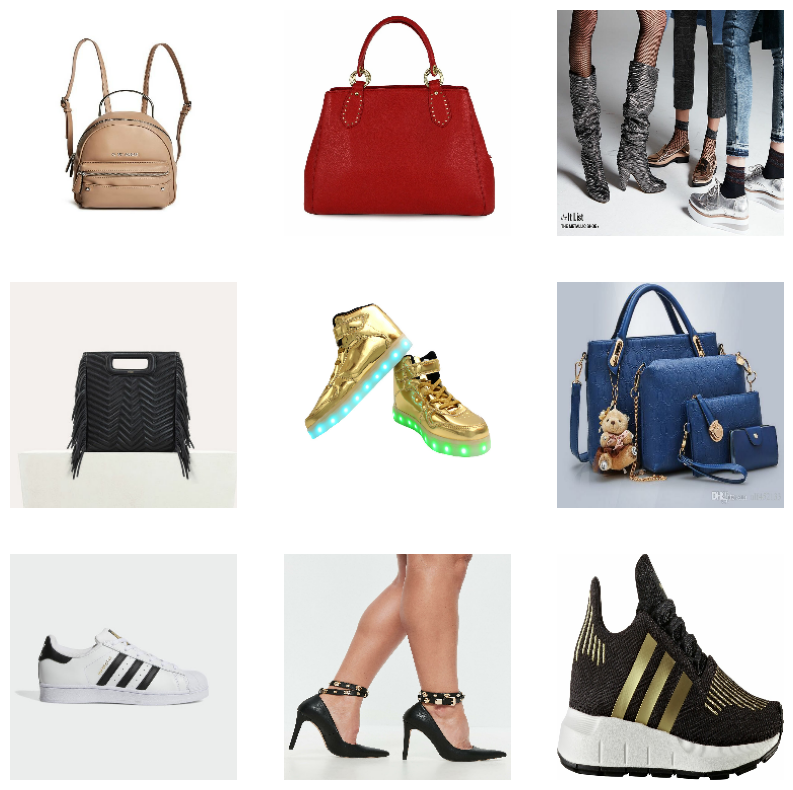

In [6]:
plt.figure(figsize=(10, 10))
for images, _ in train_dataset.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.axis("off")

In [7]:
input = keras.Input(shape=(224,224,3))
h = keras.layers.Rescaling(1/255)(input)

h = keras.layers.Conv2D(32, kernel_size=(2,2), activation="relu", name="conv1")(h)
h = keras.layers.MaxPooling2D()(h)

h = keras.layers.Conv2D(32, kernel_size=(2,2), activation="relu", name="conv2")(h)
h = keras.layers.MaxPooling2D()(h)

h = keras.layers.Flatten()(h)
output = keras.layers.Dense(1, activation="sigmoid")(h)

model1 = keras.Model(inputs=input, outputs=output)

In [8]:
model1.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling (Rescaling)           │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1 (Conv2D)                  │ (None, 223, 223, 32)   │           416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2 (Conv2D)                  │ (None, 110, 110, 32)   │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 55, 55, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 96800)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │        96,801 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,345 (395.88 KB)

 Trainable params: 101,345 (395.88 KB)

 Non-trainable params: 0 (0.00 B)

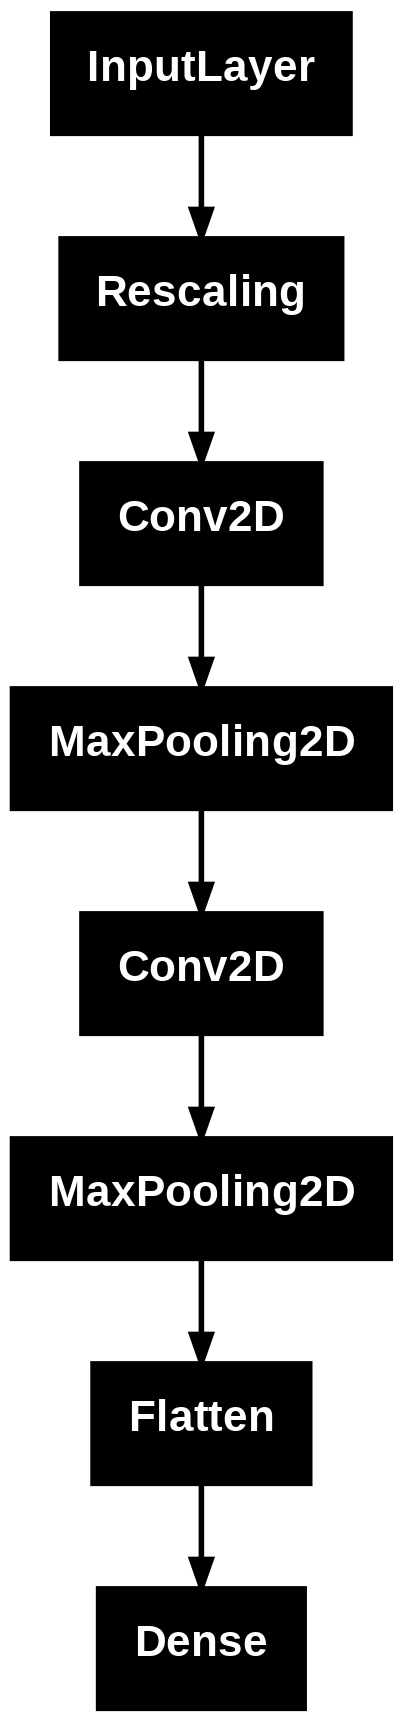

In [9]:
keras.utils.plot_model(model1)

In [10]:
model1.compile(loss='binary_crossentropy', optimizer='adam' , metrics=['accuracy'])

In [11]:
history = model1.fit(train_dataset , epochs=20, validation_data=validation_dataset)

Epoch 1/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 7s 1s/step - accuracy: 0.5448 - loss: 2.1337 - val_accuracy: 0.5102 - val_loss: 1.4891
Epoch 2/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 7s 2s/step - accuracy: 0.5144 - loss: 1.1564 - val_accuracy: 0.4898 - val_loss: 0.9122
Epoch 3/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step - accuracy: 0.5426 - loss: 0.8585 - val_accuracy: 0.4898 - val_loss: 0.8945
Epoch 4/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step - accuracy: 0.6223 - loss: 0.6163 - val_accuracy: 0.7551 - val_loss: 0.5616
Epoch 5/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 7s 2s/step - accuracy: 0.9066 - loss: 0.4270 - val_accuracy: 0.5102 - val_loss: 0.6473
Epoch 6/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step - accuracy: 0.6609 - loss: 0.4915 - val_accuracy: 0.7347 - val_loss: 0.5388
Epoch 7/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 7s 1s/step - accuracy: 0.9223 - loss: 0.3983 - val_accuracy: 0.7959 - val_loss: 0.4866
Epoch 8/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 10s 2s/step - accuracy: 0.9190 - loss: 0.3315 - val_accuracy: 0.8571 - val_loss: 0.4572
Epoch 9/20
4/4

In [12]:
def plot_learning_curves(history):
  accuracy = history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]
  loss = history.history["loss"]
  val_loss = history.history["val_loss"]

  epochs = range(1, len(accuracy) + 1)
  plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
  plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
  plt.title('Training and validation accuracy')
  plt.legend()
  plt.show()

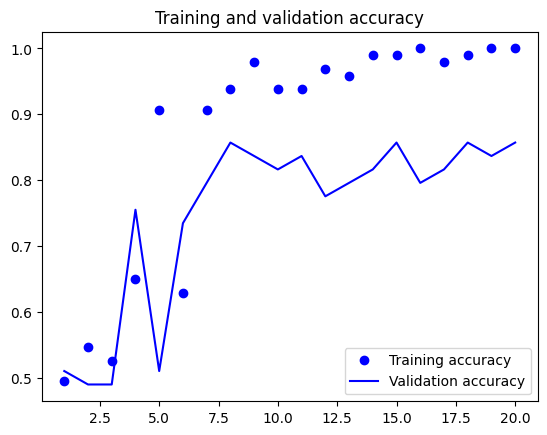

In [13]:
plot_learning_curves(history)

In [14]:
model1.evaluate(test_dataset)

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 90ms/step - accuracy: 0.6907 - loss: 0.5516


[0.5619709491729736, 0.692307710647583]




Model Built with Transfer Learning

In [15]:
resnet50 = keras.applications.ResNet50(
    weights='imagenet',
    include_top=False,
    input_shape=(224,224,3)
)

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [16]:
resnet50.summary()

Model: "resnet50"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 230, 230,  │          0 │ input_layer_1[0]… │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 112, 112,  │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 112, 112,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 112, 112,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 114, 114,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 56, 56,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 56, 56,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 56, 56,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 56, 56,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 56, 56,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 56, 56,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 56, 56,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 56, 56,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 56, 56,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_3_c

 Total params: 23,587,712 (89.98 MB)

 Trainable params: 23,534,592 (89.78 MB)

 Non-trainable params: 53,120 (207.50 KB)

In [17]:
def get_feature_and_label(dataset):
  all_features = []
  all_labels = []
  for image, label in dataset:
    preprocesssed_image = keras.applications.resnet50.preprocess_input(image)
    features = resnet50(preprocesssed_image)
    all_features.append(features)
    all_labels.append(label)
  return np.concatenate(all_features), np.concatenate(all_labels)

In [18]:
train_features, train_labels = get_feature_and_label(train_dataset)
val_features , val_label = get_feature_and_label(validation_dataset)
test_features, test_label = get_feature_and_label(test_dataset)

In [19]:
train_features.shape

(97, 7, 7, 2048)

In [20]:
input = keras.Input(shape=(7,7,2048))

h = keras.layers.Flatten()(input)
h = keras.layers.Dense(256 , activation="relu")(h)
h = keras.layers.Dropout(0.5)(h)
output = keras.layers.Dense(1 ,  activation="sigmoid")(h)

model = keras.Model(input,output)

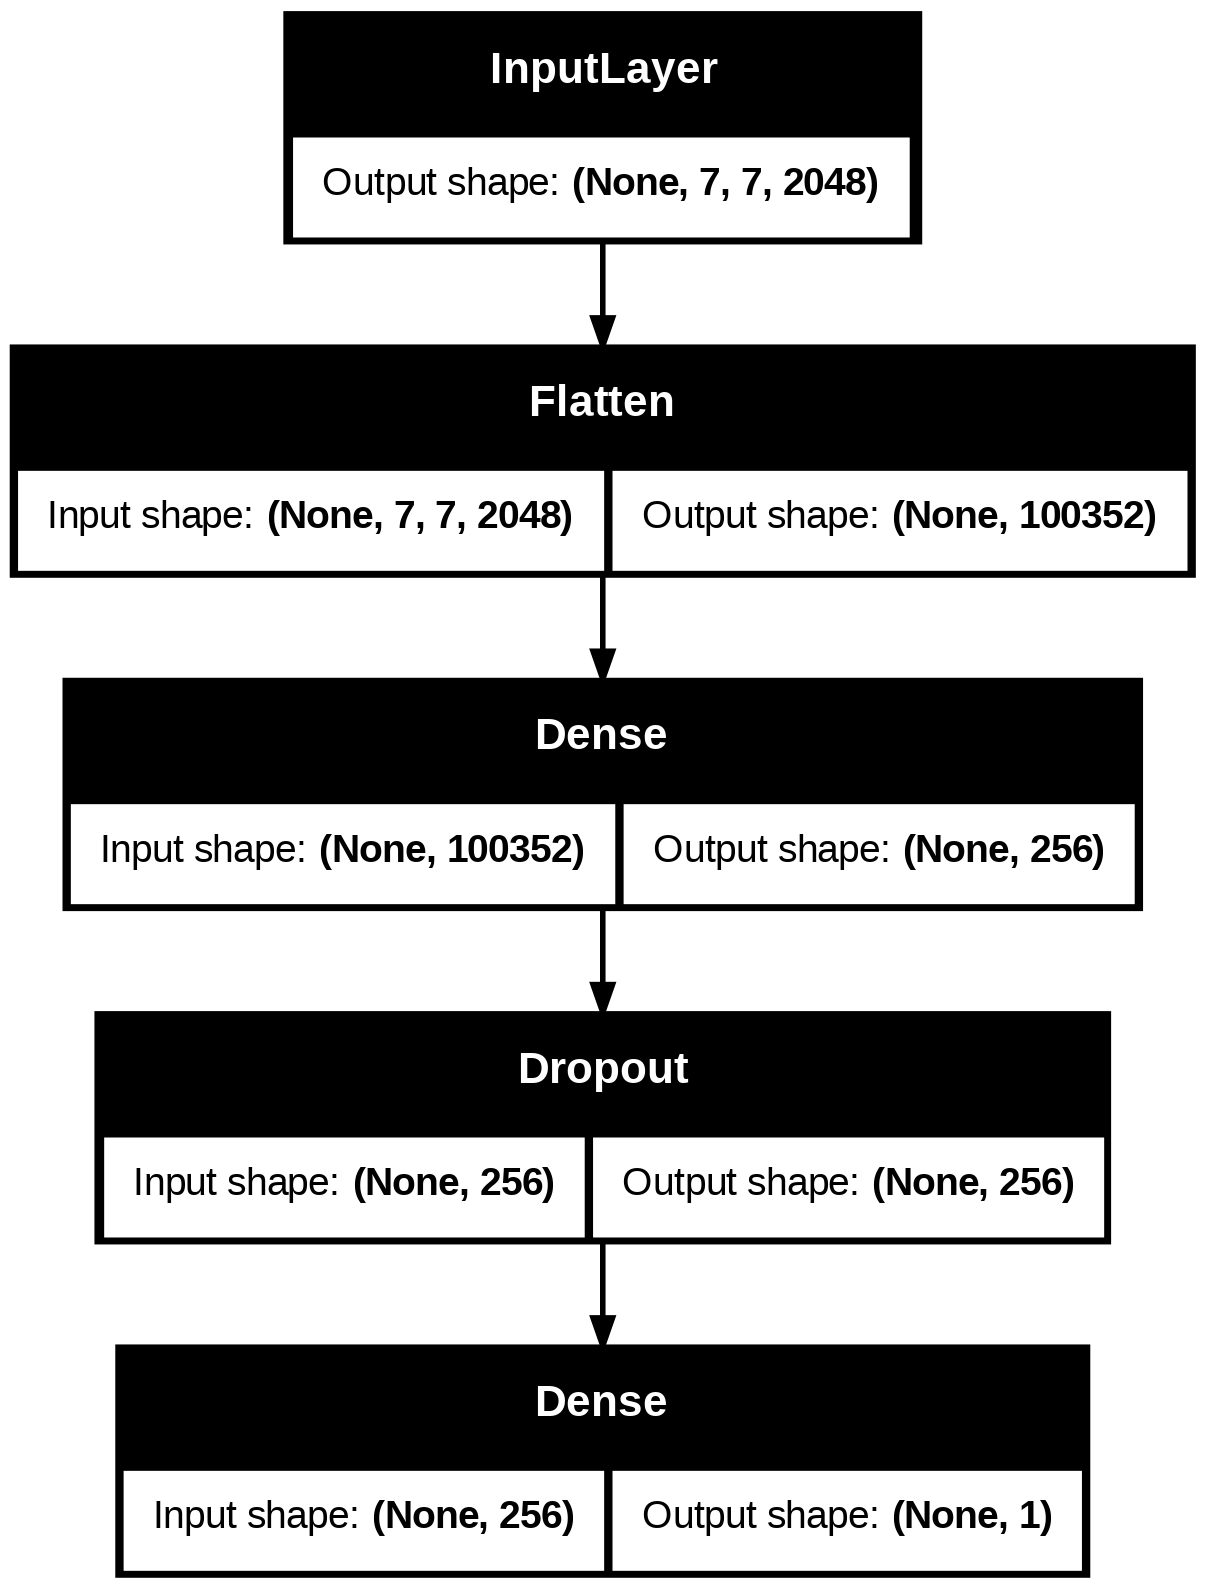

In [21]:
keras.utils.plot_model(model, show_shapes=True)

In [22]:
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 7, 7, 2048)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 100352)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │    25,690,368 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 25,690,625 (98.00 MB)

 Trainable params: 25,690,625 (98.00 MB)

 Non-trainable params: 0 (0.00 B)

In [23]:
model.compile (loss='binary_crossentropy', optimizer='adam' , metrics=['accuracy'])

history = model.fit (train_features, train_labels, epochs=15, validation_data=(val_features,val_label))

Epoch 1/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 520ms/step - accuracy: 0.4388 - loss: 26.8038 - val_accuracy: 0.9184 - val_loss: 3.1561
Epoch 2/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 468ms/step - accuracy: 0.9378 - loss: 2.0850 - val_accuracy: 0.8980 - val_loss: 3.5928
Epoch 3/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 708ms/step - accuracy: 0.9938 - loss: 0.2638 - val_accuracy: 0.9388 - val_loss: 0.9532
Epoch 4/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 464ms/step - accuracy: 1.0000 - loss: 2.5617e-13 - val_accuracy: 0.9796 - val_loss: 0.1338
Epoch 5/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 476ms/step - accuracy: 0.9844 - loss: 0.0804 - val_accuracy: 0.9796 - val_loss: 0.0423
Epoch 6/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 480ms/step - accuracy: 1.0000 - loss: 3.9241e-23 - val_accuracy: 0.9796 - val_loss: 0.2682
Epoch 7/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 540ms/step - accuracy: 1.0000 - loss: 2.9102e-35 - val_accuracy: 0.9796 - val_loss: 0.4209
Epoch 8/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 679ms/step - accuracy: 0.9907 - loss: 0.6105 - val_accuracy: 0.979

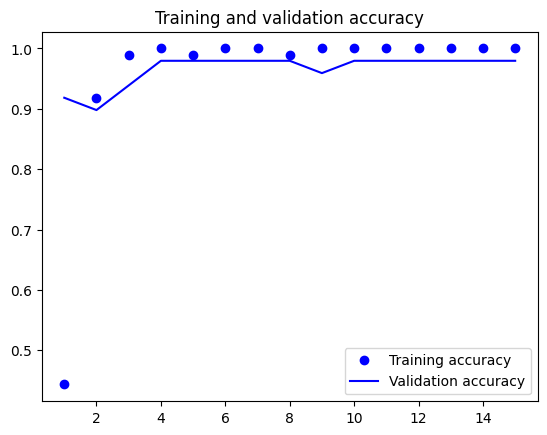

In [24]:
plot_learning_curves(history)

In [25]:
model.evaluate(test_features, test_label)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.9450 - loss: 2.2290


[2.0775399208068848, 0.9487179517745972]

This is a code for the Real Time image capture. This is going to be copy and paste from the Official MIT Opencourse Video. But by Understanding.

In [26]:
def predict_image(im):
  img = keras.preprocessing.image.load_img(im, target_size=(224,224))
  arr = keras.preprocessing.image.img_to_array(img)
  arr = keras.applications.resnet50.preprocess_input(arr)
  arr = np.expand_dims(arr, axis=0)
  arr = resnet50(arr)
  pred = model.predict(arr)
  pred = "SHOE" if pred > 0.0 else "HANDBAG"
  print("************************************\n\n")
  print(f"...........it is a {pred}!")
  print("\n\n************************************\n\n")

In [27]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename



In [ ]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))

  # Show the image which was just taken.
  display(Image(filename))
  predict_image(filename)
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))